In [20]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from queue import PriorityQueue
import os

print("Loading libraries...")

# Define the path for saving/loading the graph
graph_path = "/path/jakarta_drive.graphml"

# Load the street network for Jakarta or load from file if already exists
if os.path.exists(graph_path):
    print("Loading the street network for Jakarta from file...")
    G = ox.load_graphml(graph_path)
else:
    print("Downloading the street network for Jakarta...")
    place_name = "Jakarta, Indonesia"
    G = ox.graph_from_place(place_name, network_type='drive')
    ox.save_graphml(G, graph_path)


Loading libraries...
Loading the street network for Jakarta from file...


In [27]:
# Define starting and ending points (latitude, longitude)
print("Defining starting and ending points...")
start_point = (-6.2209825, 106.6666885)  # Lapangan Banteng
end_point = (-6.1939, 106.8231)  # Bundaran HI

# Get the nearest nodes to the starting and ending points
print("Finding the nearest nodes to the starting and ending points...")
start_node = ox.distance.nearest_nodes(G, start_point[1], start_point[0])
end_node = ox.distance.nearest_nodes(G, end_point[1], end_point[0])
print(f"Start node: {start_node}, End node: {end_node}")

# Ensure nodes are in the same connected component
if nx.has_path(G, start_node, end_node):
    print(f"There is a path between {start_node} and {end_node}.")
else:
    print(f"No path between {start_node} and {end_node}. Try different points.")
    raise SystemExit("Nodes are not connected.")


Defining starting and ending points...
Finding the nearest nodes to the starting and ending points...
Start node: 4910065333, End node: 4464981647
There is a path between 4910065333 and 4464981647.


Creating the plot...
Plotting the network...


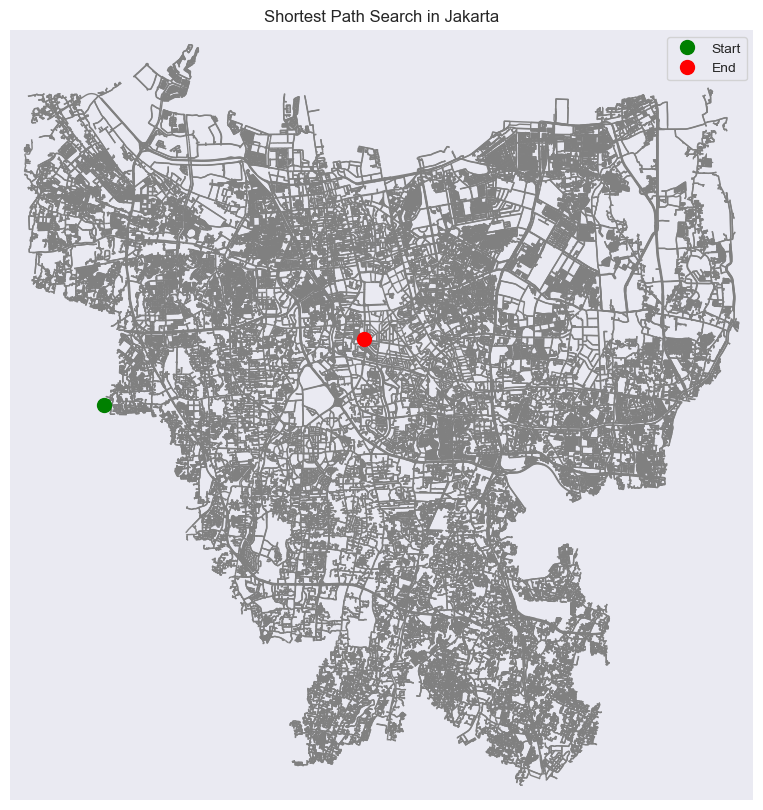

In [28]:
# Create a figure and axis
print("Creating the plot...")
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Shortest Path Search in Jakarta")

# Plot the network
print("Plotting the network...")
ox.plot_graph(G, ax=ax, node_size=0, edge_color='gray', show=False, close=False)

# Add start and end points to the plot
ax.plot(G.nodes[start_node]['x'], G.nodes[start_node]['y'], 'go', markersize=10, label='Start')
ax.plot(G.nodes[end_node]['x'], G.nodes[end_node]['y'], 'ro', markersize=10, label='End')

# Display the initial plot
plt.legend()
plt.show()


In [29]:
import matplotlib.pyplot as plt

# Function to draw and save the shortest path on the map
def draw_and_save_path(G, shortest_path, start_node, end_node):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title("Shortest Path Search in Jakarta")

    # Plot the network
    ox.plot_graph(G, ax=ax, node_size=0, edge_color='gray', show=False, close=False)

    # Plot the shortest path
    nodes = list(shortest_path)
    for i in range(len(nodes) - 1):
        u, v = nodes[i], nodes[i + 1]
        x = [G.nodes[u]['x'], G.nodes[v]['x']]
        y = [G.nodes[u]['y'], G.nodes[v]['y']]
        ax.plot(x, y, color='blue')
        print(f"Step {i + 1}: from node {u} to node {v}")

    # Add start and end points to the plot
    ax.plot(G.nodes[start_node]['x'], G.nodes[start_node]['y'], 'go', markersize=10, label='Start')
    ax.plot(G.nodes[end_node]['x'], G.nodes[end_node]['y'], 'ro', markersize=10, label='End')

    # Add legend
    plt.legend()

    # Save the figure
    plt.savefig('shortest_path_jakarta.png')
    print("The shortest path image has been saved as 'shortest_path_jakarta.png'.")

    # Show the figure
    plt.show()

Starting A* algorithm using NetworkX...
Shortest path found: [4910065333, 4910065334, 6285313060, 6285332627, 4910065330, 4910065337, 9657770401, 5632145083, 5632145080, 4910065550, 4910065551, 3622276717, 1709440005, 3622276783, 3622276771, 5495319708, 6261285709, 3622276772, 9660123210, 4833856457, 357774043, 6261077657, 357777881, 5495320862, 4910065430, 357778034, 1709439982, 1709439967, 4908707026, 5634024413, 4908707036, 4908710946, 5495204841, 5634024352, 4908707063, 1709439986, 4908707086, 344580094, 11221470495, 2600699414, 2600699404, 8496123056, 6320025432, 10119278718, 9192079836, 6320055550, 2600703945, 5482009898, 5482009901, 2600699419, 5482010587, 2600699426, 5482010539, 6365088513, 4914253243, 5482010554, 4914253505, 5482144847, 333910480, 344371395, 5482144899, 333874530, 333899629, 4914029904, 5481598375, 344093772, 5487556987, 333899594, 5487558167, 5487558164, 7105283731, 333873778, 5487558122, 344373182, 9017163083, 333876398, 344373238, 344373236, 1541684324, 360

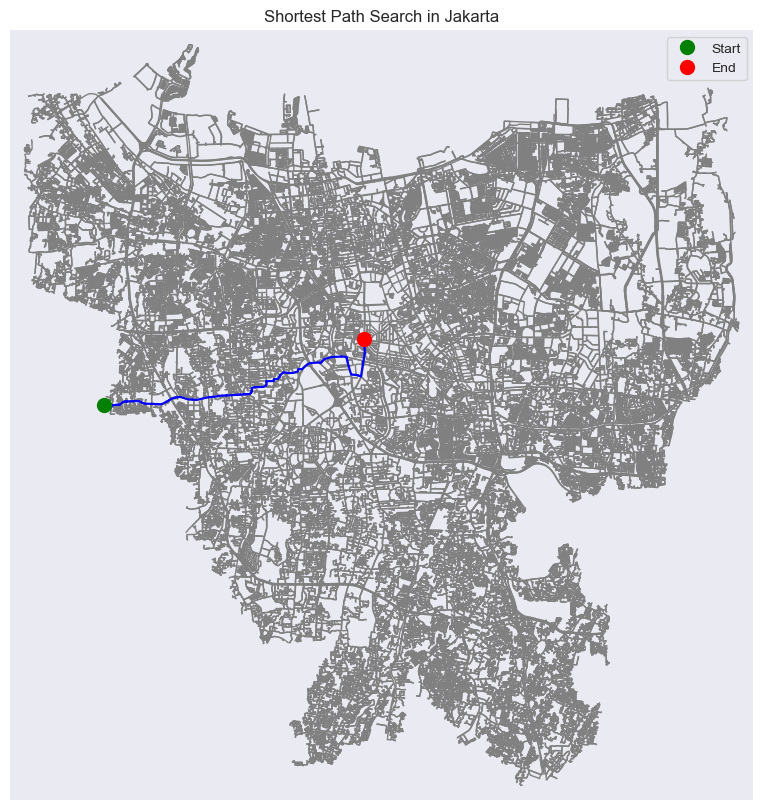

In [30]:
# Function to find the shortest path using A* algorithm with NetworkX
def find_shortest_path_astar(G, start_node, end_node):
    print("Starting A* algorithm using NetworkX...")
    try:
        shortest_path = nx.astar_path(G, source=start_node, target=end_node, weight='length')
        print(f"Shortest path found: {shortest_path}")
        return shortest_path
    except nx.NetworkXNoPath:
        print(f"No path found between {start_node} and {end_node}")
        return None

# Compute the shortest path using A* algorithm
shortest_path = find_shortest_path_astar(G, start_node, end_node)
if shortest_path:
    # Draw and save the shortest path
    draw_and_save_path(G, shortest_path, start_node, end_node)
else:
    print("Failed to find a shortest path.")


Starting Dijkstra's algorithm using NetworkX...
Shortest path found: [4910065333, 4910065334, 6285313060, 6285332627, 4910065330, 4910065337, 9657770401, 5632145083, 5632145080, 4910065550, 4910065551, 3622276717, 1709440005, 3622276783, 3622276771, 5495319708, 6261285709, 3622276772, 9660123210, 4833856457, 357774043, 6261077657, 357777881, 5495320862, 4910065430, 357778034, 1709439982, 1709439967, 4908707026, 5634024413, 4908707036, 4908710946, 5495204841, 5634024352, 4908707063, 1709439986, 4908707086, 344580094, 11221470495, 2600699414, 2600699404, 8496123056, 6320025432, 10119278718, 9192079836, 6320055550, 2600703945, 5482009898, 5482009901, 2600699419, 5482010587, 2600699426, 5482010539, 6365088513, 4914253243, 5482010554, 4914253505, 5482144847, 333910480, 344371395, 5482144899, 333874530, 333899629, 4914029904, 5481598375, 344093772, 5487556987, 333899594, 5487558167, 5487558164, 7105283731, 333873778, 5487558122, 344373182, 9017163083, 333876398, 344373238, 344373236, 1541684

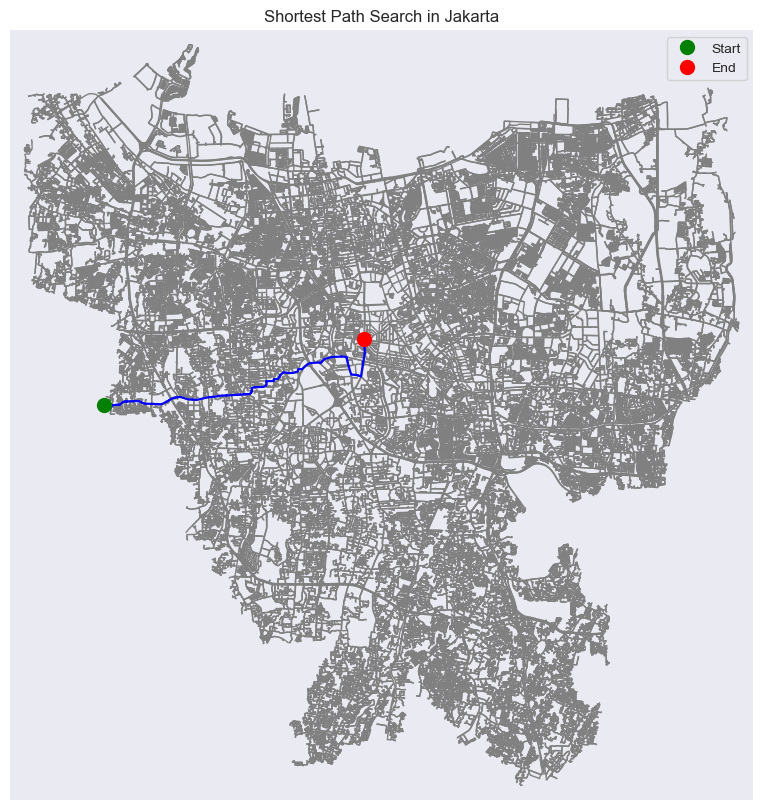

In [31]:
# Function to check if a path exists and find the shortest path using NetworkX
def find_shortest_path(G, start_node, end_node):
    print("Starting Dijkstra's algorithm using NetworkX...")
    try:
        shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='length')
        print(f"Shortest path found: {shortest_path}")
        return shortest_path
    except nx.NetworkXNoPath:
        print(f"No path found between {start_node} and {end_node}")
        return None

# Compute the shortest path using NetworkX's Dijkstra's algorithm
shortest_path = find_shortest_path(G, start_node, end_node)
if shortest_path:
    print(f"Shortest path: {shortest_path}")
    draw_and_save_path(G, shortest_path, start_node, end_node)
else:
    print("Failed to find a shortest path.")
